In [1]:
from models.batch_self_teacher import BatchSelfTeacher
from models.active_learner import ActiveLearner

import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from itertools import permutations

%matplotlib inline

In [2]:
# active learner
num_features = 8
hyp_space_type = "boundary"
al = ActiveLearner(num_features, hyp_space_type)
_, _, al_first_feature_prob = al.run()

In [ ]:
# TODO: create batch self teacher with simplest working example

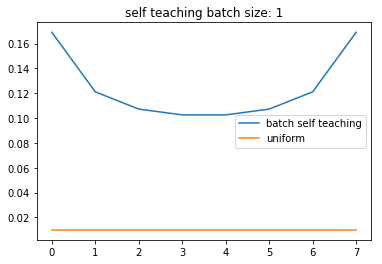

/Users/waikeenvong/Dropbox/research/current-projects/self-teaching/models/batch_self_teacher.py:120: RuntimeWarning: invalid value encountered in true_divide
  np.sum(self.learner_posterior, axis=0))


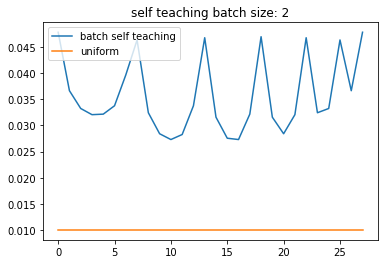

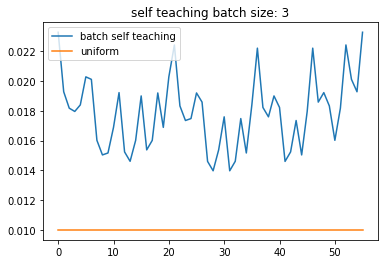

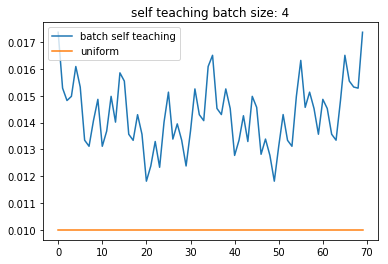

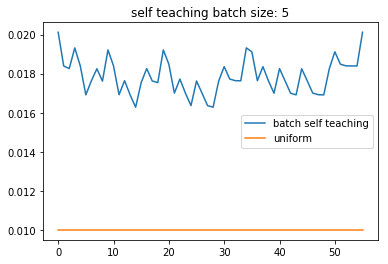

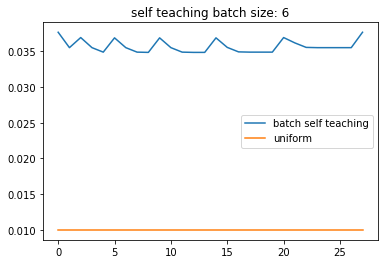

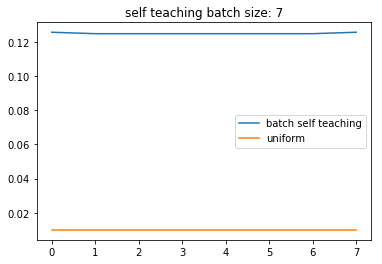

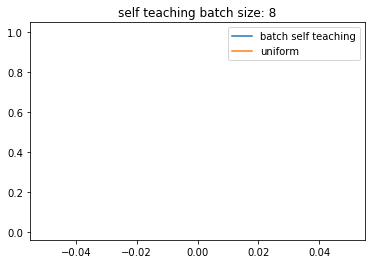

In [5]:
# batch self teacher
batch_sizes = np.arange(1, num_features + 1)

for batch_size in batch_sizes:
    bst = BatchSelfTeacher(num_features, hyp_space_type, batch_size)
    bst_first_feature_prob = bst.get_first_feature_prob()
    plt.plot(np.arange(len(bst_first_feature_prob)), bst_first_feature_prob, label="batch self teaching")
    plt.plot(np.arange(len(bst_first_feature_prob)), np.ones(len(bst_first_feature_prob)) * 0.01, label = "uniform")
    # plt.plot(np.arange(num_features), al_first_feature_prob, label = "active learning")
    plt.legend()
    plt.title("self teaching batch size: %s" % batch_size)
    plt.show()

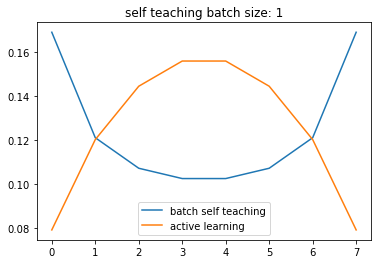

/Users/waikeenvong/Dropbox/research/current-projects/self-teaching/models/batch_self_teacher.py:120: RuntimeWarning: invalid value encountered in true_divide
  np.sum(self.learner_posterior, axis=0))


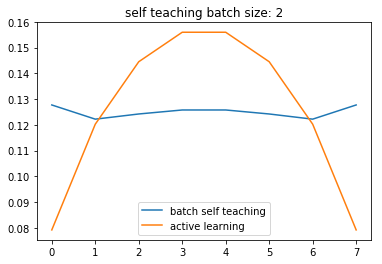

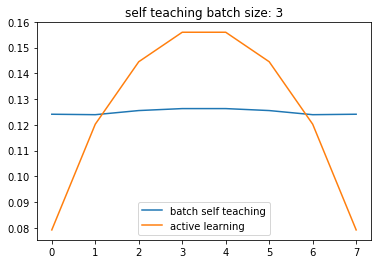

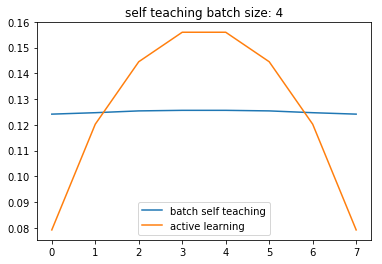

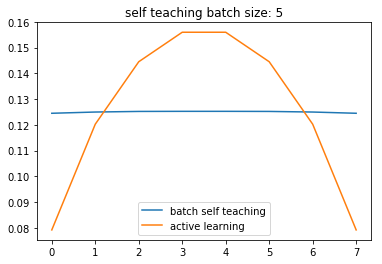

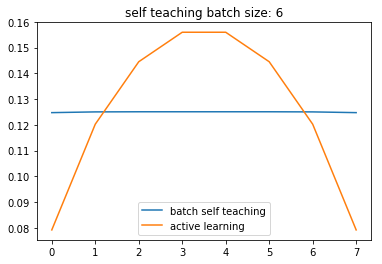

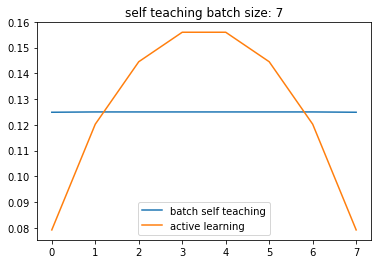

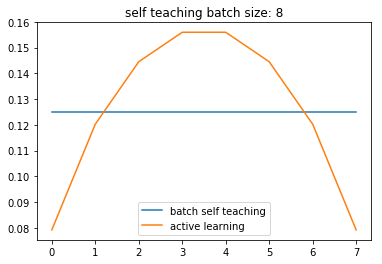

In [8]:
for batch_size in batch_sizes:
    bst = BatchSelfTeacher(num_features, hyp_space_type, batch_size)
    bst_first_feature_prob = bst.get_first_feature_prob()
    plt.plot(np.arange(num_features), bst_first_feature_prob, label="batch self teaching")
    plt.plot(np.arange(num_features), al_first_feature_prob, label = "active learning")
    plt.legend()
    plt.title("self teaching batch size: %s" % batch_size)
    plt.show()

In [31]:
sample_feature = bst.sample_self_teaching_posterior()
sample_label = bst.true_hyp[sample_feature]
print(sample_feature)
print(sample_label)

self teaching posterior 1.0
0
0


In [83]:
# get indices of features from sample_feature
sample_feature_idx = np.where(bst.features == sample_feature)
sample_label_idx = np.where(bst.labels == sample_label)
print(sample_feature_idx)
print(sample_label_idx)
sample_feature_idx = sample_feature_idx[0]
sample_label_idx = sample_label_idx[0]

(array([0, 1]), array([0, 0]))
(array([0, 0, 1, 2]), array([0, 1, 0, 1]))


In [135]:
# print(bst.learner_posterior[:, sample_feature_idx, :])
# print(bst.learner_posterior)
i1, i2 = np.ix_(sample_feature_idx, sample_label_idx)
foo = bst.learner_posterior[:, i1, i2]
np.mean(foo, axis=(1, 2))

# print(bst.learner_posterior[:, :, 1])

array([ 0.    ,  0.1875,  0.1875,  0.375 ])

[ 0.1277421   0.12222785  0.12423839  0.12579167  0.12579167  0.12423839
  0.12222785  0.1277421 ]
[ 0.1277421   0.12222785  0.12423839  0.12579167  0.12579167  0.12423839
  0.12222785  0.1277421 ]


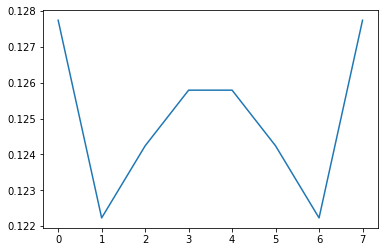

In [7]:
# for i in range(10):
#     bst.update_learner_posterior()
#     bst.update_self_teaching_posterior()

# import matplotlib.pyplot as plt
# foo = bst.sample_self_teaching_posterior()
# plt.plot(np.arange(num_features), foo)
# plt.show()